# Model 3 - Recumbent Fold

A recumbent (overturned) fold. We start by importing the necessary dependencies:

In [11]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [12]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/examples/input_data/model3_orientations.csv",
                        path_i = os.pardir+"/examples/input_data/model3_surface_points.csv") 

../..\gempy\data_management.py:1267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  values = np.vstack(map(np.ravel, g)).T.astype("float32")


In [13]:
geo_data.get_data()

X        Y      Z formation          series  \
interfaces   0      0.0    200.0  800.0     rock1  Default series   
             51   300.0    800.0  770.0     rock1  Default series   
             27   200.0    500.0  220.0     rock1  Default series   
             28   300.0    500.0  770.0     rock1  Default series   
             29   300.0    500.0  230.0     rock1  Default series   
             4    200.0    200.0  780.0     rock1  Default series   
             5    200.0    200.0  220.0     rock1  Default series   
             6    300.0    200.0  770.0     rock1  Default series   
             7    300.0    200.0  230.0     rock1  Default series   
             8    400.0    200.0  760.0     rock1  Default series   
             9    400.0    200.0  240.0     rock1  Default series   
             10   700.0    200.0  500.0     rock1  Default series   
             12     0.0      0.0  200.0     rock1  Default series   
             23     0.0    500.0  200.0     rock1  Default series   
             13   100.0      0.0  790.0     rock1  Default series   
             14   100.0      0.0  210.0     rock1  Default series   
             15   200.0      0.0  780.0     rock1  Default series   
             16   200.0      0.0  220.0     rock1  Default series   
             17   300.0      0.0  770.0     rock1  Default series   
             18   300.0      0.0  230.0     rock1  Default series   
             19   400.0      0.0  760.0     rock1  Default series   
             20   400.0      0.0  240.0     rock1  Default series   
             21   700.0      0.0  500.0     rock1  Default series   
             22     0.0    500.0  800.0     rock1  Default series   
             50   200.0    800.0  220.0     rock1  Default series   
             52   300.0    800.0  230.0     rock1  Default series   
             53   400.0    800.0  760.0     rock1  Default series   
             54   400.0    800.0  240.0     rock1  Default series   
             3    100.0    200.0  210.0     rock1  Default series   
             2    100.0    200.0  790.0     rock1  Default series   
...                 ...      ...    ...       ...             ...   
             78   100.0    500.0  410.0     rock2  Default series   
             79   200.0    500.0  580.0     rock2  Default series   
             102  300.0    800.0  430.0     rock2  Default series   
             103  400.0    800.0  560.0     rock2  Default series   
             80   200.0    500.0  420.0     rock2  Default series   
             81   300.0    500.0  570.0     rock2  Default series   
             82   300.0    500.0  430.0     rock2  Default series   
             83   400.0    500.0  560.0     rock2  Default series   
             84   400.0    500.0  440.0     rock2  Default series   
             85     0.0   1000.0  600.0     rock2  Default series   
             86     0.0   1000.0  400.0     rock2  Default series   
             87   100.0   1000.0  590.0     rock2  Default series   
             88   100.0   1000.0  410.0     rock2  Default series   
             89   200.0  10000.0  580.0     rock2  Default series   
             90   200.0   1000.0  420.0     rock2  Default series   
             91   300.0   1000.0  570.0     rock2  Default series   
             92   300.0   1000.0  430.0     rock2  Default series   
             93   400.0   1000.0  560.0     rock2  Default series   
             94   400.0   1000.0  440.0     rock2  Default series   
             95     0.0    800.0  600.0     rock2  Default series   
             96     0.0    800.0  400.0     rock2  Default series   
             97   100.0    800.0  590.0     rock2  Default series   
             98   100.0    800.0  410.0     rock2  Default series   
             99   200.0    800.0  580.0     rock2  Default series   
             100  200.0    800.0  420.0     rock2  Default series   
             101  300.0    800.0  570.0     rock2  Default series   
             104  40

Setting and ordering the units and series:

In [14]:
gp.set_series(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')},
              order_series = ['Strat_Series','Basement_Series'],
              order_formations=np.array(['rock2','rock1','basement']), verbose=0)

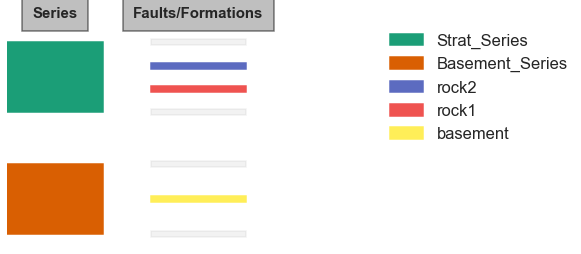

In [15]:
#%matplotlib inline
gp.get_sequential_pile(geo_data)

In [16]:
%matplotlib inline
#gp.plotting.plot_data(geo_data, direction='y')

Calculating the model:

In [17]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [18]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Displaying the result in x and y direction:

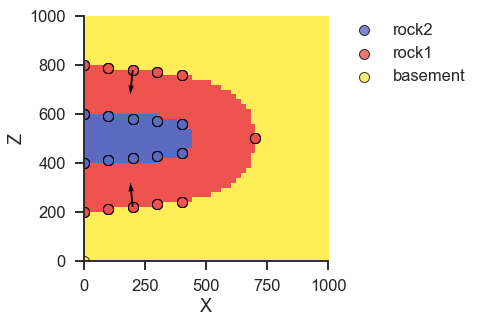

In [19]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='y', plot_data=True)

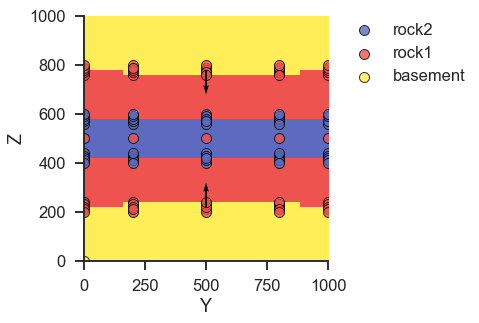

In [22]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=15,
                         direction='x', plot_data=True)